<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/airport2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction_small.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


**데이터 설명**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고객 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와이파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

In [4]:
# 기술통계 확인
data.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2580.000000
mean,65179.742248,39.229845,1204.824806,2.732558,3.041473,2.758527,2.973256,3.229457,3.242248,3.440310,3.329070,3.361628,3.298450,3.599225,3.318992,3.620155,3.277907,14.856202,15.285159,0.427132
std,37320.994433,15.295065,1008.852185,1.317032,1.542290,1.400792,1.271752,1.341635,1.341842,1.329681,1.334021,1.266627,1.313897,1.168210,1.256309,1.182093,1.317367,35.808534,36.301790,0.494758
min,54.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32988.750000,26.000000,405.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64877.000000,40.000000,860.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97717.000000,51.000000,1754.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000,1.000000
max,129860.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

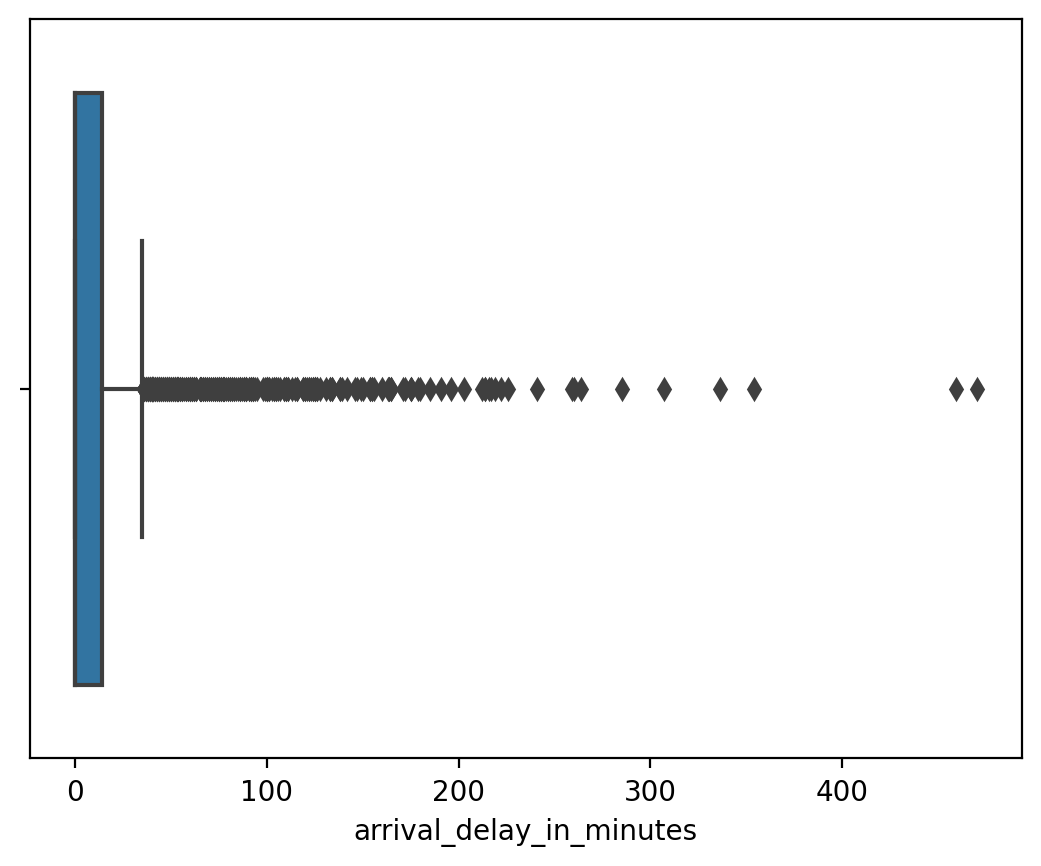

In [6]:
sns.boxplot(x='arrival_delay_in_minutes', data=data)
plt.show()

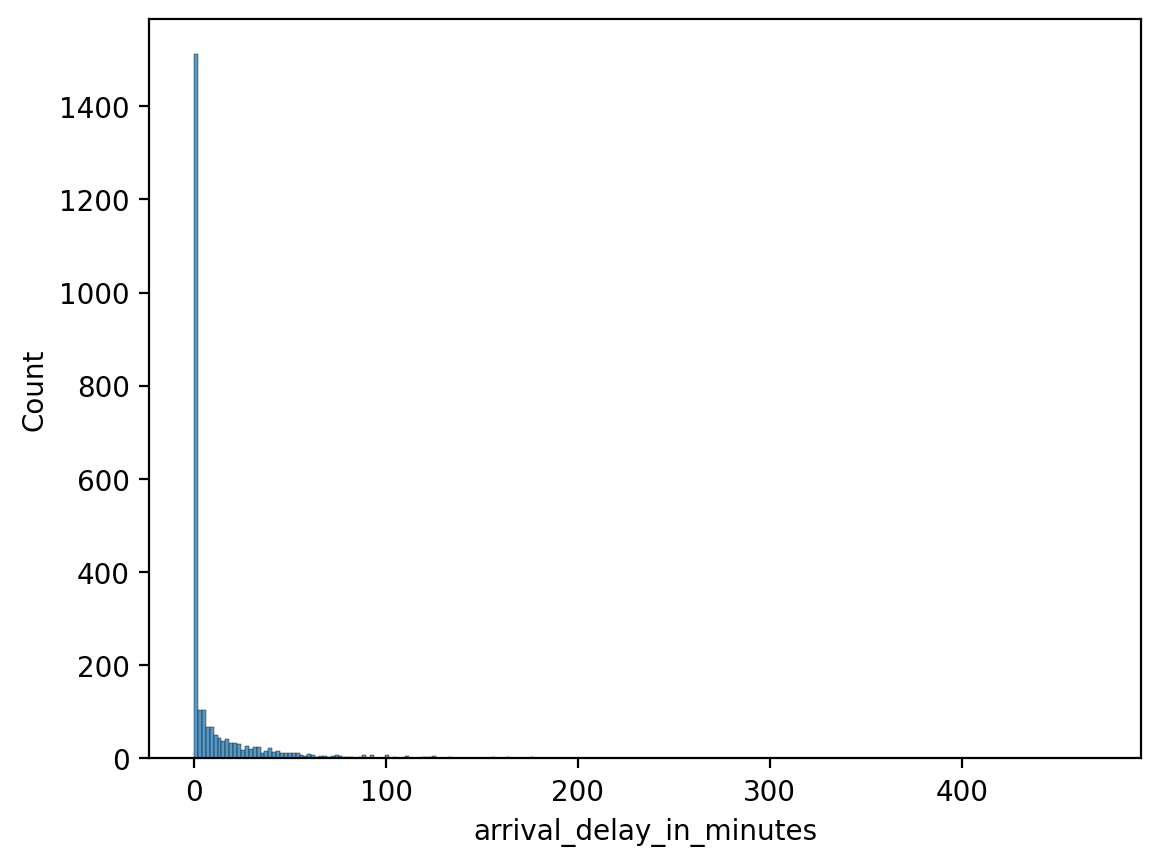

In [7]:
sns.histplot(x='arrival_delay_in_minutes', data=data)
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [8]:
# 변수 제거: id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes
del_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    2580 non-null   object 
 1   customer_type             2580 non-null   object 
 2   age                       2580 non-null   int64  
 3   type_of_travel            2580 non-null   object 
 4   class                     2580 non-null   object 
 5   flight_distance           2580 non-null   int64  
 6   inflight_wifi_service     2580 non-null   int64  
 7   ease_of_online_booking    2580 non-null   int64  
 8   food_and_drink            2580 non-null   int64  
 9   online_boarding           2580 non-null   int64  
 10  seat_comfort              2580 non-null   int64  
 11  inflight_entertainment    2580 non-null   int64  
 12  on-board_service          2580 non-null   int64  
 13  leg_room_service          2580 non-null   int64  
 14  baggage_

**2) 결측치 제거**

In [17]:
data['arrival_delay_in_minutes'].mode()[0]

0.0

In [18]:
# 결측치 제거
# data.isna().sum()
# data['arrival_delay_in_minutes'].isna().sum()
data['arrival_delay_in_minutes'].fillna(data['arrival_delay_in_minutes'].mode()[0], inplace=True)
# 확인
data['arrival_delay_in_minutes'].isna().sum()

0

**3) x, y 분리**

In [19]:
# Target 설정
target = 'satisfaction'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**4) 가변수화**

In [20]:
# 가변수화 대상: gender, customer_type, type_of_travel, class
dumm_cols = ['gender', 'customer_type', 'type_of_travel', 'class']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,1,0,1,0,1
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0


**5) 학습용, 평가용 데이터 분리**

In [21]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**6) 정규화**

In [22]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)


# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [ ]:
# xgboost 설치
# pip install xgboost

In [ ]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [23]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**1) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [24]:
# 선언하기
model = KNeighborsClassifier()

In [25]:
# 성능예측
cv_score = cross_val_score(model, x_train_s, y_train, cv=5)

In [26]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.8839779  0.86980609 0.89473684 0.88919668 0.91135734]
0.8898149706922147


In [27]:
# 결과수집
results = {}
results['KNN'] = cv_score.mean()

**2) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [29]:
# 선언하기
model = DecisionTreeClassifier(random_state=1)

In [30]:
# 성능예측
cv_score=cross_val_score(model, x_train, y_train, cv=5)

In [31]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.90055249 0.88919668 0.88365651 0.89196676 0.90581717]
0.8942379210602838


In [32]:
# 결과수집
results['Dtree'] = cv_score.mean()

**3) Logistic Regression**

- Logistic Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [33]:
# 선언하기
model = LogisticRegression()

In [34]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [35]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.8121547  0.83102493 0.80055402 0.83933518 0.86426593]
0.8294669503068517


In [36]:
# 결과수집
results['Logstic'] = cv_score.mean()

**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [37]:
# 선언하기
model = RandomForestClassifier(random_state=1)

In [38]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [39]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.93093923 0.91966759 0.93074792 0.91689751 0.93905817]
0.9274620835310141


In [40]:
# 결과수집
results['RanFor'] = cv_score.mean()

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [41]:
# 선언하기
model = XGBClassifier(random_state=1)

In [42]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [43]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.93646409 0.93074792 0.93628809 0.91966759 0.94736842]
0.9341072221116911


In [44]:
# 결과수집
results['XGB'] = cv_score.mean()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [45]:
# 선언하기
model = LGBMClassifier(random_state=1, verbose=-100)

In [46]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [47]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.94751381 0.93628809 0.92797784 0.91412742 0.9501385 ]
0.9352091336220749


In [48]:
# 결과수집
results['LGBM'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [50]:
# 성능 비교
print('=' * 40)
for m_name, score in results.items():
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.89
Dtree 0.894
Logstic 0.829
RanFor 0.927
XGB 0.934
LGBM 0.935


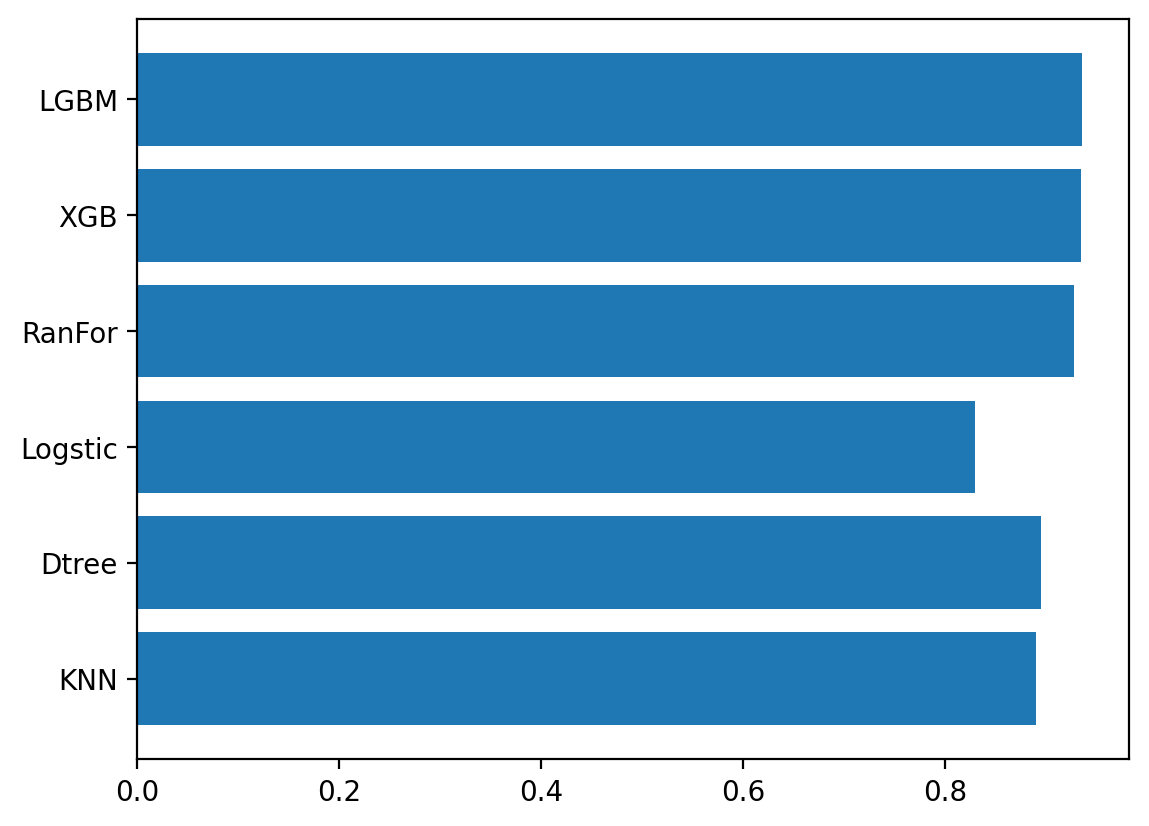

In [52]:
# 성능 시각화 비교
plt.barh(list(results.keys()), results.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 XGBoost 모델 성능을 튜닝합니다.

In [53]:
# 기본 모델 선언
model_xgb = XGBClassifier()

# 파라미터 지정
  # max_depth: range(1, 21)
params = {'max_depth':range(1,21)}

# 모델 선언
model = GridSearchCV(model_xgb, params, cv=5)





In [54]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(1, 21)})

In [55]:
# 최적 파라미터, 예측 최고 성능
print(model.best_params_)
print(model.best_score_)

{'max_depth': 8}
0.9374252001040695


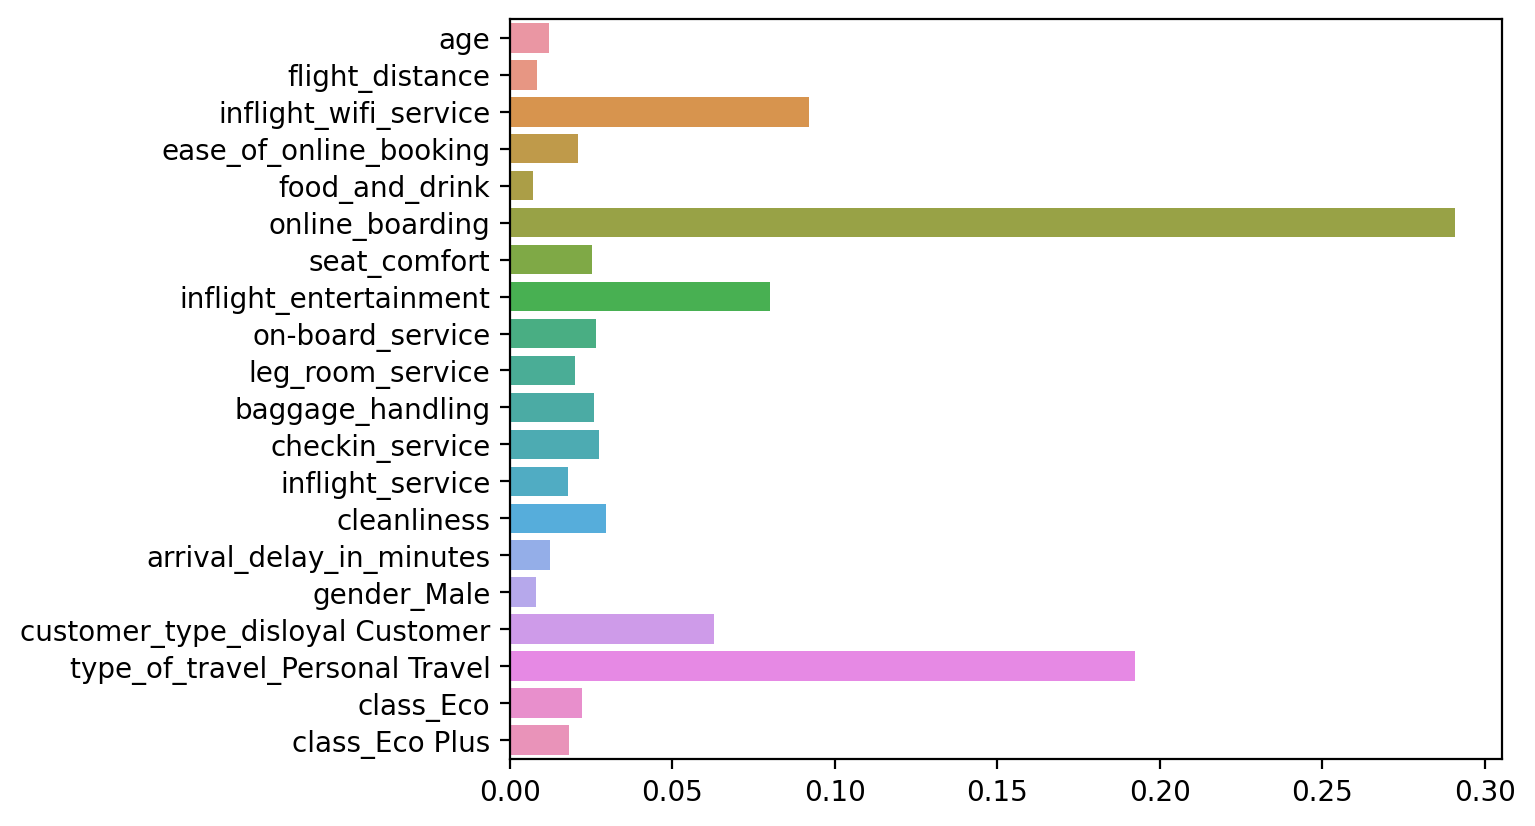

In [56]:
# 변수 중요도 시각화
sns.barplot(x=model.best_estimator_.feature_importances_, y=x_train.columns)
plt.show()


# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [57]:
# 예측하기
y_pred = model.predict(x_test)

In [58]:
# 성능평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[406  15]
 [ 30 323]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       421
           1       0.96      0.92      0.93       353

    accuracy                           0.94       774
   macro avg       0.94      0.94      0.94       774
weighted avg       0.94      0.94      0.94       774

